CREW AI

BLOG WRITER MULTI AGENT

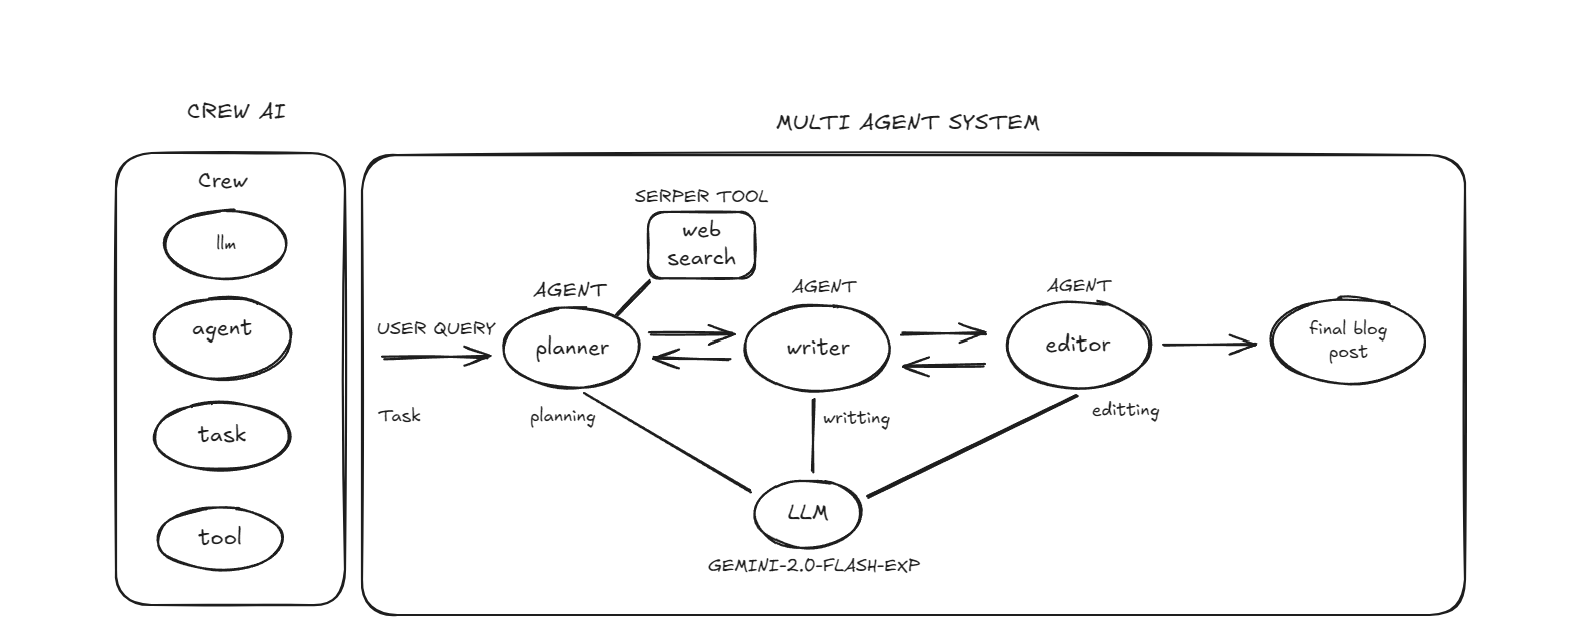

In [1]:
from IPython.display import Image

# Display the image
Image(filename='multi agent blog writer.png')

DOWNLOAD PACKAGES SPECIFIED IN REQUIREMENTS.TXT

In [ ]:
pip install crewai crewai_tools dotenv

In [ ]:
pip install langchain langchain-google-genai

In [48]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [9]:
from crewai import Agent , Task , Crew ,LLM

In [3]:
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()
KEY = os.getenv("GOOGLE_API_KEY")
# Initialize the Gemini LLM
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",
    verbose=True,
    temperature=0.5,
    google_api_key=os.getenv("GOOGLE_API_KEY")
)



SETTING UP GEMINI KEY

In [24]:
from dotenv import load_dotenv
import os

load_dotenv()
KEY = os.getenv("GOOGLE_API_KEY")

In [73]:
my_llm = LLM(
    api_key=KEY,
    model="gemini/gemini-2.0-flash-exp",
)

SETTING UP CREW AI TOOL / SERPER WEB SEARCH TOOL

In [10]:
from crewai_tools import SerperDevTool
from dotenv import load_dotenv
import os

load_dotenv()

os.environ['SERPER_API_KEY'] = os.getenv('SERPER_API_KEY')

# Initialize the tool for internet searching capabilities
tool = SerperDevTool()

In [3]:
from crewai_tools import DallETool

dalle_tool = DallETool(model="dall-e-3",
                       size="1024x1024",
                       quality="standard",
                       n=1)

PLANNER AGENT

In [11]:
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory="You're working on planning a blog article "
              "about the topic: {topic} in 'https://medium.com/'."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "You have to prepare a detailed "
              "outline and the relevant topics and sub-topics that has to be a part of the"
              "blogpost."
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    allow_delegation=False,
    verbose=True,
    # llm = my_llm,
    tools=[tool]
)



WRITER AGENT

In [12]:

writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic} in 'https://medium.com/'. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    allow_delegation=False,
    verbose=True,
    # llm= my_llm
)


EDITOR AGENT

In [15]:

editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization 'https://medium.com/'. ",
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    allow_delegation=False,
    verbose=True,
    # llm=my_llm,
)



GRAPHIC DESIGNER

In [ ]:
designer = Agent(
    role = "Senior Banner Image Designer",
    goal="Create a banner image for the blog post "
    "topic {topic} that is engaging and visually appealing.",
    backstory="You are a Senior Banner Image Designer "
            "who receives a request to create a banner image "
            "for the blog post topic: {topic}.Your goal is to "
            "create a visually appealing and engaging image "
            "that captures the essence of the blog post "
            "and attracts readers' attention. "
            "You have to ensure that the image is relevant ",
    allow_delegation=False,
    verbose=True,
    tools=[dalle_tool]
)

SPECIFYING TASKS

In [16]:

plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
    tools = [tool]
)


write = Task(
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
  "3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    agent=writer,

)




edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."
                 ),
    expected_output="A well-written blog post in markdown format, "
                    "without the word markdown in the beginning "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    agent=editor,
)

# designing = Task(
#     description=("Create a banner image for the blog post "
#                 "make sure it is relevant and engaging."),
#     expected_output="A visually appealing banner image "
#                     "related to the blog post topic.",
#     agent=designer,
#     tools=[dalle_tool]

# )





COMBINING CREW

In [17]:

crew = Crew(
    agents=[planner, writer , editor],
    tasks=[plan, write,edit],
    verbose=True,
)


2025-01-07 13:25:14,892 - 2956 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


FINAL BLOG

In [11]:

result = crew.kickoff(inputs={"topic": "Agentic AI"})
result

# Agent: Content Planner
## Task: 1. Prioritize the latest trends, key players, and noteworthy news on Agentic AI.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


# Agent: Content Planner
## Thought: Okay, I understand. My task is to create a detailed content plan for a blog post about Agentic AI on Medium, focusing on trends, key players, news, audience, and SEO. I will start by gathering information using the search tool.
## Using tool: Search the internet
## Tool Input: 
"{\"search_query\": \"latest trends in Agentic AI\"}"
## Tool Output: 

Search results: Title: Agentic AI: Three themes to watch for 2025 - Constellation Research
Link: https://www.constellationr.com/blog-news/insights/agentic-ai-three-themes-watch-2025
Snippet: Google Cloud launched Agentspace, Salesforce is prepping Agentforce 2.0 a

2025-01-05 15:22:54,117 - 2228 - __init__.py-__init__:362 - ERROR: Exception while exporting Span batch.
Traceback (most recent call last):
  File "c:\Users\hp\Desktop\PIAIC\crew ai agents\blog writer multi agent\exampro_env\Lib\site-packages\urllib3\connectionpool.py", line 536, in _make_request
  File "c:\Users\hp\Desktop\PIAIC\crew ai agents\blog writer multi agent\exampro_env\Lib\site-packages\urllib3\connection.py", line 507, in getresponse
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 1395, in getresponse
    response.begin()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 2

TypeError: Markdown expects text, not CrewOutput(raw="```markdown\n# The Rise of Agentic AI: A New Era of Autonomous Intelligence\n\nThe field of artificial intelligence is undergoing a rapid transformation, and at the forefront of this evolution is Agentic AI. Unlike traditional AI systems that operate based on predefined rules, Agentic AI focuses on developing AI agents capable of making autonomous decisions and proactively solving problems. This shift marks a significant step toward more intelligent and adaptable systems, attracting considerable interest and driving growth across numerous industries. This article explores the key trends shaping Agentic AI, the major players leading the innovation, and the diverse real-world applications that are emerging.\n\nThe fundamental difference lies in the concept of autonomy. Traditional AI excels at tasks like pattern recognition but requires human input for decision-making. Agentic AI, conversely, can perceive its environment, interpret information, and take actions to achieve specific goals without explicit human guidance. This capability, coupled with the capacity to learn and adapt, is why autonomous AI is receiving so much attention. We're transitioning from simple automation to an era of sophisticated, intelligent agents.\n\n## Key Trends Shaping Agentic AI\n\nSeveral key trends are propelling the rapid advancement of Agentic AI. We're witnessing a marked increase in the autonomy and decision-making capabilities of AI agents, enabling them to handle more complex tasks and situations. This is complemented by a growing emphasis on proactive problem-solving, where agents anticipate issues and take preventative measures, rather than simply reacting to them. These agents are not just data processors; they are evolving into sophisticated problem solvers.\n\nAnother significant trend is the development of multi-modal AI agents, capable of processing information from various sources like text, images, and audio. This enables a richer and more nuanced understanding of the world, crucial for many real-world applications. Additionally, there's an increasing focus on emotional intelligence in AI interactions, where agents can understand and respond appropriately to human emotions, leading to more intuitive and effective interactions. Furthermore, improved agent orchestration and collaboration are enabling multiple agents to work together to solve problems more efficiently, which highlights the potential for scalability and adaptability of Agentic AI. Finally, the trend towards integration with smaller, more efficient LLMs is increasing accessibility, and we're observing a significant growth in enterprise adoption beyond initial pilot projects.\n\n## Leading the Charge: Key Players in Agentic AI\n\nThe development of Agentic AI is being driven by both established tech giants and emerging innovative companies. Major players such as Microsoft, Google (DeepMind), Amazon (AWS), OpenAI, NVIDIA, and IBM are investing heavily in research and development. For instance, Microsoft is integrating AI agents into its Copilot platform, and Google is developing tools like AgentSpace, demonstrating their commitment to this technology. However, it's not only these large corporations.\n\nEmerging leaders like Anthropic, Oracle, and Teneo are also making significant contributions. Companies specializing in platforms and tools, such as UiPath, Cognigy, and Rapid Innovation, are helping to build the ecosystem for creating and deploying AI agents. It's also noteworthy that some companies are focusing on specific sectors, such as interface.ai, which is leveraging Agentic AI for financial services. This diversity of expertise is pushing the entire field forward.\n\n## Real-World Applications: How Agentic AI is Being Used\n\nThe applications of Agentic AI are incredibly diverse, spanning across numerous sectors. In customer service, we're seeing widespread adoption in chatbots and virtual assistants, where AI agents can resolve queries and provide support without human intervention. Furthermore, in data analytics and business intelligence, autonomous AI is playing a crucial role in making sense of complex datasets to inform strategic decisions.\n\nMoreover, Agentic AI is transforming areas like product strategies and development by streamlining the process through enhanced market analysis, and it's optimizing supply chain management and logistics through improved forecasting and planning. In IT operations and management, AI agents can proactively identify and resolve system issues, ensuring smooth operations, and also enhance personalized customer experiences. We are also seeing significant advancements in financial services automation, improved efficiency in healthcare and social care, and general workflow automation across multiple sectors, underscoring the flexibility of Agentic AI.\n\n## Latest News and Developments in Agentic AI\n\nRecent news and developments in the field highlight the rapid pace of innovation. We've seen the launch of products like Agentforce 2.0 and announcements of new features and capabilities. Furthermore, several research breakthroughs provide insights into more efficient learning algorithms and improved agent architectures.\n\nRecent partnerships and acquisitions are further consolidating the industry, driving more innovation and competition. The discussions surrounding the opportunities and risks of Agentic AI are also gaining momentum. This reflects a growing understanding of the powerful implications of this technology and the need to proactively address any ethical concerns.\n\n## Risks and Challenges of Agentic AI\n\nDespite its vast potential, Agentic AI presents a set of challenges. One of the primary concerns revolves around ethical considerations and biases in AI decision-making. If AI agents are trained on biased data, they may perpetuate and even amplify existing societal prejudices. There are also growing concerns about potential job displacement due to automation, which requires careful planning and mitigation strategies.\n\nAdditionally, security concerns and vulnerabilities are very real, as sophisticated AI systems become increasingly attractive targets for malicious actors. This highlights the need for clear regulations and guidelines to ensure the responsible development and deployment of Agentic AI. The complexity of these systems also makes them difficult to manage and debug, further complicating their rollout.\n\n## The Future is Agentic: Embracing the Revolution\n\nIn conclusion, Agentic AI is poised to transform our world, offering new ways to interact with technology, enhance productivity, and solve complex problems. As we have explored, from the trends that shape it to the key players driving the innovation, and the vast array of practical applications, the potential for autonomous AI is enormous. It's clear that this technology will revolutionize industries and our daily lives, underscoring the importance of staying informed about advancements in this space.\n\nAs we move forward, it will be crucial for businesses, researchers, and individuals to recognize the transformative potential of Agentic AI. We must also be mindful of the risks and collaborate to ensure its ethical and responsible use. By proactively embracing this revolution, we can unlock the vast opportunities that Agentic AI offers and shape a future where these powerful tools benefit everyone.\n\n## Stay Ahead of the Curve\n\nTo truly harness the potential of Agentic AI, it’s essential to stay updated on the latest trends and developments. We encourage you to follow industry news, research papers, and technology blogs. Consider exploring further reading and resources to deepen your understanding of this emerging field.\n\nWe invite you to share your thoughts and experiences in the comments section below; your contributions are invaluable to the discussion. For more insights into Agentic AI and other emerging technologies, please follow this blog and connect with the author. Furthermore, consider exploring courses or other resources to expand your expertise in this space, as continuous learning is essential in today’s rapidly evolving tech world.\n```", pydantic=None, json_dict=None, tasks_output=[TaskOutput(description='1. Prioritize the latest trends, key players, and noteworthy news on Agentic AI.\n2. Identify the target audience, considering their interests and pain points.\n3. Develop a detailed content outline including an introduction, key points, and a call to action.\n4. Include SEO keywords and relevant data or sources.', name=None, expected_output='A comprehensive content plan document with an outline, audience analysis, SEO keywords, and resources.', summary='1. Prioritize the latest trends, key players, and noteworthy news...', raw='```\n{\n  "content_plan": {\n    "title": "Agentic AI: Trends, Players, and What\'s Next",\n     "target_audience": {\n      "description": "Technology enthusiasts, business professionals, AI/ML practitioners, and decision-makers interested in understanding and leveraging the potential of Agentic AI. They are likely familiar with basic AI concepts but seek deeper insights into this emerging field.",\n      "interests": [\n          "Understanding cutting-edge AI developments",\n          "Exploring practical applications of AI in various industries",\n          "Learning about the business impact of Agentic AI",\n          "Keeping up-to-date with the latest trends in artificial intelligence",\n          "Preparing for the future of work and automation",\n          "Implementing AI solutions effectively"\n      ],\n      "pain_points": [\n          "Difficulty keeping up with rapid AI advancements",\n          "Lack of clarity on how to implement AI solutions",\n          "Concerns about job displacement due to automation",\n          "Uncertainty about the risks and benefits of Agentic AI",\n          "Limited practical knowledge of Agentic AI use cases"\n      ]\n   },\n    "seo_keywords": [\n      "Agentic AI",\n      "AI agents",\n      "autonomous AI",\n      "artificial intelligence",\n      "machine learning",\n      "AI trends 2025",\n      "AI automation",\n      "AI use cases",\n      "generative AI",\n       "AI platforms",\n       "AI development",\n       "AI companies"\n    ],\n    "outline": {\n      "introduction": {\n        "heading": "The Rise of Agentic AI: A New Era of Autonomous Intelligence",\n        "points": [\n          "Briefly introduce Agentic AI and its significance.",\n          "Highlight the difference between traditional AI and Agentic AI (autonomy, decision-making).",\n          "Mention the rapid growth and interest in the technology.",\n          "State the purpose of the article: to explore trends, key players, and real-world applications."\n          ]\n      },\n      "key_points": {\n           "trends": {\n                "heading": "Key Trends Shaping Agentic AI",\n                "sub_points":[\n                     "Increased autonomy and decision-making capabilities",\n                     "Focus on proactive problem-solving",\n                     "Development of multi-modal AI agents",\n                     "Emphasis on emotional intelligence in AI interactions",\n                     "Improved agent orchestration and collaboration",\n                     "Scalability and adaptability of Agentic AI",\n                    "Integration with smaller, more efficient LLMs.",\n                    "Growth in enterprise adoption beyond initial pilot projects"\n                    ]\n\n              },\n              "key_players":{\n                "heading":"Leading the Charge: Key Players in Agentic AI",\n                "sub_points": [\n                      "Major tech companies: Microsoft, Google (DeepMind), Amazon (AWS), OpenAI, NVIDIA, IBM.",\n                      "Emerging leaders: Anthropic, Oracle, Teneo.",\n                      "Platforms & tools providers: UiPath, Cognigy, Rapid Innovation.",\n                      "Highlight specific contributions or products from these companies (e.g., Google AgentSpace, Microsoft Copilot).",\n                      "Note companies in specific sectors e.g., interface.ai for financial services"\n                     ]\n               },\n            "use_cases": {\n              "heading": "Real-World Applications: How Agentic AI is Being Used",\n              "sub_points": [\n                "Customer service automation (chatbots, virtual assistants)",\n                "Data analytics and business intelligence",\n                "Streamlining product strategies and development",\n                "Supply chain management and logistics",\n                "IT operations and management",\n                "Personalized customer experience enhancement",\n                 "Financial services automation and efficiency.",\n                 "Healthcare and social care applications",\n                "Workflow automation across various sectors."\n                ]\n            },\n           "news_and_developments":{\n            "heading":"Latest News and Developments in Agentic AI",\n            "sub_points":[\n              "Discuss recent product launches and announcements (e.g., Agentforce 2.0).",\n              "Mention relevant research breakthroughs and advancements.",\n              "Highlight recent partnerships or acquisitions in the field.",\n              "Address discussions around opportunities and risks of Agentic AI."\n            ]\n        },\n          "risks_and_challenges": {\n                "heading": "Risks and Challenges of Agentic AI",\n                 "sub_points":[\n                      "Ethical considerations and biases in AI decision-making.",\n                      "Potential job displacement due to automation.",\n                      "Security concerns and vulnerabilities.",\n                      "The need for clear regulations and guidelines.",\n                       "The difficulty to manage and debug complex AI systems."\n                      ]\n                 }\n      },\n      "conclusion": {\n        "heading": "The Future is Agentic: Embracing the Revolution",\n          "points":[\n               "Summarize the key takeaways from the article.",\n               "Emphasize the transformative potential of Agentic AI across industries.",\n              "Encourage readers to explore opportunities to leverage Agentic AI in their own fields.",\n              "Reiterate the importance of staying informed on the developments in this space."\n              ]\n      },\n      "call_to_action": {\n          "heading": "Stay Ahead of the Curve",\n          "points": [\n              "Encourage readers to follow industry news and research on Agentic AI.",\n              "Suggest further reading and resources for deeper exploration.",\n              "Prompt readers to share their thoughts and experiences in the comments section.",\n              "Encourage readers to connect with the author or follow the blog for more insights.",\n              "Consider adding a call to action to specific courses or resources."\n          ]\n        }\n    },\n    "resources": [\n      { "title": "Constellation Research", "url": "https://www.constellationr.com/blog-news/insights/agentic-ai-three-themes-watch-2025" },\n       { "title": "ThoughtSpot Blog", "url": "https://www.thoughtspot.com/data-trends/ai/agentic-ai-examples" },\n      { "title": "Dataversity", "url": "https://www.dataversity.net/agentic-models-smaller-llms-and-other-ai-trends-for-2025/" },\n      { "title": "Raconteur", "url": "https://www.raconteur.net/technology/2025-ai-trends" },\n       { "title":"Analytics Vidhya", "url":"https://www.analyticsvidhya.com/blog/2024/12/ai-agent-trends/"},\n      {"title": "Berkeley SCET", "url": "https://scet.berkeley.edu/the-next-next-big-thing-agentic-ais-opportunities-and-risks/"},\n       {"title": "Infosys Blogs", "url": "https://blogs.infosys.com/emerging-technology-solutions/artificial-intelligence/agentic-ai-the-new-trend-in-generative-ai.html"},\n       {"title":"World Economic Forum", "url":"https://www.weforum.org/stories/2024/12/agentic-ai-financial-services-autonomy-efficiency-and-inclusion/"},\n      {"title":"Cisco Blogs", "url":"https://blogs.cisco.com/news/agentic-ai-a-game-changer-for-it"},\n      {"title":"Cognigy Blog","url":"https://www.cognigy.com/blog/what-is-agentic-ai"},\n      {"title":"Persistence Market Research","url":"https://www.persistencemarketresearch.com/blog/top-10-companies-in-agentic-ai-market-in-2024.asp"},\n      {"title":"Medium Article","url":"https://medium.com/@elisowski/a-list-of-ai-agents-set-to-dominate-in-2025-028f975c5b99"},\n       {"title": "Azilen", "url": "https://www.azilen.com/learning/agentic-ai-vendors/"},\n       {"title":"Teneo Blog","url":"https://www.teneo.ai/blog/5-companies-leading-the-way-in-ai-agent-technology"},\n       {"title":"Put It Forward","url":"https://www.putitforward.com/agentic-ai-leaders"},\n        {"title":"Interface.ai Blog","url":"https://interface.ai/blog/agentic-ai-leaders-next-tech-boom/"},\n       {"title":"Yahoo Finance","url":"https://finance.yahoo.com/news/agentic-ai-gain-traction-2025-143600338.html"},\n      {"title":"Productive Edge","url":"https://www.productiveedge.com/blog/gartners-top-10-tech-trends-of-2025-agentic-ai-and-beyond"},\n      {"title":"Rapid Innovation Blog","url":"https://www.rapidinnovation.io/post/top-7-ai-agent-development-companies"},\n     {"title":"CIO Article", "url":"https://www.cio.com/article/3603856/agentic-ai-promising-use-cases-for-business.html"},\n     {"title":"HBR Article", "url":"https://hbr.org/2024/12/what-is-agentic-ai-and-how-will-it-change-work"},\n     {"title":"Globe Newswire","url":"https://www.globenewswire.com/news-release/2024/12/31/3003011/0/en/Emergence-of-Agentic-AI-Revolutionizing-Enterprise-Automation-Across-Industries.html"},\n     {"title":"CX Today","url":"https://www.cxtoday.com/crm/18-use-cases-for-agentic-ai-in-customer-experience/"},\n      {"title":"AI Today","url":"https://aitoday.com/finance-and-ma/agentic-ai-the-new-frontier-of-enterprise-ai/"},\n      {"title":"SSON","url":"https://www.ssonetwork.com/intelligent-automation/articles/3-potential-use-cases-for-agentic-ai"}\n\n    ]\n  }\n}\n```', pydantic=None, json_dict=None, agent='Content Planner', output_format=<OutputFormat.RAW: 'raw'>), TaskOutput(description="1. Use the content plan to craft a compelling blog post on Agentic AI.\n2. Incorporate SEO keywords naturally.\n3. Sections/Subtitles are properly named in an engaging manner.\n4. Ensure the post is structured with an engaging introduction, insightful body, and a summarizing conclusion.\n5. Proofread for grammatical errors and alignment with the brand's voice.\n", name=None, expected_output='A well-written blog post in markdown format, ready for publication, each section should have 2 or 3 paragraphs.', summary='1. Use the content plan to craft a compelling blog...', raw="```markdown\n# The Rise of Agentic AI: A New Era of Autonomous Intelligence\n\nThe landscape of artificial intelligence is rapidly evolving, and at the forefront of this transformation is **Agentic AI**. Unlike traditional AI systems that follow predefined rules, Agentic AI involves the development of **AI agents** capable of autonomous decision-making and proactive problem-solving. This shift represents a significant leap towards more intelligent and adaptable systems, sparking considerable interest and growth across industries. This article delves into the core trends shaping Agentic AI, the key players driving innovation, and the diverse real-world applications that are emerging.\n\nThe fundamental difference lies in autonomy. Traditional AI excels at tasks like pattern recognition, but it needs human input to make decisions. **Agentic AI**, on the other hand, can perceive its environment, interpret information, and take actions to achieve specific goals without explicit human direction. This capability, combined with the capacity to learn and adapt, is why **autonomous AI** is garnering so much attention. We're moving beyond simple automation into an era of intelligent agents.\n\n## Key Trends Shaping Agentic AI\n\nSeveral key trends are fueling the rapid advancement of Agentic AI. We are witnessing a distinct increase in the **autonomy and decision-making capabilities** of AI agents, allowing them to handle more complex tasks and situations. This is coupled with a growing emphasis on **proactive problem-solving**, where agents anticipate issues and take preventative measures, rather than merely reacting to them. These agents are not just data processors, they are becoming problem solvers.\n\nAnother significant trend is the development of **multi-modal AI agents**, capable of processing information from various sources like text, images, and audio. This allows for a richer and more nuanced understanding of the world, which is vital for many real-world applications. Additionally, there is an increasing focus on **emotional intelligence in AI interactions**, where agents can understand and respond appropriately to human emotions, making interactions more intuitive and effective. Furthermore, **improved agent orchestration and collaboration** are enabling multiple agents to work together to solve problems more efficiently, which speaks to the potential of scalability and adaptability of **Agentic AI**. Finally, the trend towards **integration with smaller, more efficient LLMs** is increasing accessibility, and we're observing **growth in enterprise adoption** beyond initial pilot projects.\n\n## Leading the Charge: Key Players in Agentic AI\n\nThe development of Agentic AI is being propelled by both established tech giants and emerging innovative companies. Major players such as **Microsoft, Google (DeepMind), Amazon (AWS), OpenAI, NVIDIA, and IBM** are heavily investing in research and development. For example, Microsoft is integrating **AI agents** into its Copilot platform, and Google is developing tools like AgentSpace, which underscores the commitment to this technology. However, it's not just these giants.\n\nEmerging leaders like **Anthropic, Oracle, and Teneo** are also making significant contributions. Companies specializing in platforms and tools like **UiPath, Cognigy, and Rapid Innovation**, are helping to build the ecosystem for creating and deploying AI agents. It's also worth noting that some companies are focusing on specific sectors, such as **interface.ai**, which is leveraging Agentic AI for financial services. This variety of expertise is pushing the field forward.\n\n## Real-World Applications: How Agentic AI is Being Used\n\nThe applications of Agentic AI are incredibly diverse, spanning across numerous sectors. In **customer service,** we are seeing widespread adoption in **chatbots and virtual assistants**, where AI agents can resolve queries and provide support without human intervention. Furthermore, in **data analytics and business intelligence**, **autonomous AI** is playing a crucial role in making sense of complex datasets to inform strategic decisions.\n\nMoreover, **Agentic AI** is transforming areas like **product strategies and development** by streamlining the process through better market analysis, and it's optimizing **supply chain management and logistics** through improved forecasting and planning. In **IT operations and management**, AI agents can proactively identify and resolve system issues, ensuring smooth operations, and also enhance **personalized customer experiences**. We are also seeing significant advancements in **financial services automation**, improved efficiency in **healthcare and social care**, and general **workflow automation** across multiple sectors, underscoring the flexibility of Agentic AI.\n\n## Latest News and Developments in Agentic AI\n\nRecent news and developments in the field underscore the rapid pace of innovation. We've seen the launch of products such as **Agentforce 2.0**, and announcements of new features and capabilities. Furthermore, there have been several research breakthroughs, which provide insights into more efficient learning algorithms and improved agent architectures.\n\nRecent partnerships and acquisitions are further consolidating the industry, driving more innovation and competition. The conversations around the **opportunities and risks of Agentic AI** are also gaining momentum. This reflects the growing understanding of the powerful implications of this technology and the need to address any ethical concerns proactively.\n\n## Risks and Challenges of Agentic AI\n\nDespite its vast potential, **Agentic AI** comes with its set of challenges. One of the primary concerns revolves around **ethical considerations and biases in AI decision-making**. If AI agents are trained on biased data, they may perpetuate and even amplify existing societal prejudices. There are also growing concerns about **potential job displacement due to automation**, which requires careful planning and mitigation strategies.\n\nAdditionally, **security concerns and vulnerabilities** are very real, as sophisticated AI systems become increasingly attractive targets for malicious actors. This highlights the need for **clear regulations and guidelines** to ensure the responsible development and deployment of **Agentic AI**. The complexity of these systems also adds the **difficulty to manage and debug**, further complicating the rollout.\n\n## The Future is Agentic: Embracing the Revolution\n\nIn summary, **Agentic AI** is poised to transform our world, offering new ways to interact with technology, enhance productivity, and solve complex problems. As we have explored, from the trends that shape it to the key players that drive the innovation, and the vast array of practical uses, the potential for **autonomous AI** is enormous. It's clear that this technology will revolutionize industries and our daily lives, thus underscoring the importance of staying informed about advancements in the space.\n\nAs we move forward, it will be vital for businesses, researchers, and individuals to recognize the transformative potential of **Agentic AI**. We must also be mindful of the risks and work together to ensure its ethical and responsible use. By proactively embracing the revolution, we can unlock the vast opportunities that **Agentic AI** offers and shape a future where these powerful tools benefit everyone.\n\n## Stay Ahead of the Curve\n\nTo truly harness the potential of **Agentic AI**, it's essential to stay updated on the latest trends and developments. We encourage you to follow industry news, research papers, and technology blogs. Consider exploring further reading and resources to deepen your knowledge and understanding of this emerging field.\n\nWe invite you to share your thoughts and experiences in the comments section below, your contributions are invaluable to the discussion. For more insights into **Agentic AI** and other emerging technologies, please follow this blog and connect with the author. Furthermore, consider exploring courses or other resources, to expand your expertise in this space, as continuous learning is essential in today's rapidly evolving tech world.\n```", pydantic=None, json_dict=None, agent='Content Writer', output_format=<OutputFormat.RAW: 'raw'>), TaskOutput(description="Proofread the given blog post for grammatical errors and alignment with the brand's voice.", name=None, expected_output='A well-written blog post in markdown format, ready for publication, each section should have 2 or 3 paragraphs.', summary='Proofread the given blog post for grammatical errors and alignment...', raw="```markdown\n# The Rise of Agentic AI: A New Era of Autonomous Intelligence\n\nThe field of artificial intelligence is undergoing a rapid transformation, and at the forefront of this evolution is Agentic AI. Unlike traditional AI systems that operate based on predefined rules, Agentic AI focuses on developing AI agents capable of making autonomous decisions and proactively solving problems. This shift marks a significant step toward more intelligent and adaptable systems, attracting considerable interest and driving growth across numerous industries. This article explores the key trends shaping Agentic AI, the major players leading the innovation, and the diverse real-world applications that are emerging.\n\nThe fundamental difference lies in the concept of autonomy. Traditional AI excels at tasks like pattern recognition but requires human input for decision-making. Agentic AI, conversely, can perceive its environment, interpret information, and take actions to achieve specific goals without explicit human guidance. This capability, coupled with the capacity to learn and adapt, is why autonomous AI is receiving so much attention. We're transitioning from simple automation to an era of sophisticated, intelligent agents.\n\n## Key Trends Shaping Agentic AI\n\nSeveral key trends are propelling the rapid advancement of Agentic AI. We're witnessing a marked increase in the autonomy and decision-making capabilities of AI agents, enabling them to handle more complex tasks and situations. This is complemented by a growing emphasis on proactive problem-solving, where agents anticipate issues and take preventative measures, rather than simply reacting to them. These agents are not just data processors; they are evolving into sophisticated problem solvers.\n\nAnother significant trend is the development of multi-modal AI agents, capable of processing information from various sources like text, images, and audio. This enables a richer and more nuanced understanding of the world, crucial for many real-world applications. Additionally, there's an increasing focus on emotional intelligence in AI interactions, where agents can understand and respond appropriately to human emotions, leading to more intuitive and effective interactions. Furthermore, improved agent orchestration and collaboration are enabling multiple agents to work together to solve problems more efficiently, which highlights the potential for scalability and adaptability of Agentic AI. Finally, the trend towards integration with smaller, more efficient LLMs is increasing accessibility, and we're observing a significant growth in enterprise adoption beyond initial pilot projects.\n\n## Leading the Charge: Key Players in Agentic AI\n\nThe development of Agentic AI is being driven by both established tech giants and emerging innovative companies. Major players such as Microsoft, Google (DeepMind), Amazon (AWS), OpenAI, NVIDIA, and IBM are investing heavily in research and development. For instance, Microsoft is integrating AI agents into its Copilot platform, and Google is developing tools like AgentSpace, demonstrating their commitment to this technology. However, it's not only these large corporations.\n\nEmerging leaders like Anthropic, Oracle, and Teneo are also making significant contributions. Companies specializing in platforms and tools, such as UiPath, Cognigy, and Rapid Innovation, are helping to build the ecosystem for creating and deploying AI agents. It's also noteworthy that some companies are focusing on specific sectors, such as interface.ai, which is leveraging Agentic AI for financial services. This diversity of expertise is pushing the entire field forward.\n\n## Real-World Applications: How Agentic AI is Being Used\n\nThe applications of Agentic AI are incredibly diverse, spanning across numerous sectors. In customer service, we're seeing widespread adoption in chatbots and virtual assistants, where AI agents can resolve queries and provide support without human intervention. Furthermore, in data analytics and business intelligence, autonomous AI is playing a crucial role in making sense of complex datasets to inform strategic decisions.\n\nMoreover, Agentic AI is transforming areas like product strategies and development by streamlining the process through enhanced market analysis, and it's optimizing supply chain management and logistics through improved forecasting and planning. In IT operations and management, AI agents can proactively identify and resolve system issues, ensuring smooth operations, and also enhance personalized customer experiences. We are also seeing significant advancements in financial services automation, improved efficiency in healthcare and social care, and general workflow automation across multiple sectors, underscoring the flexibility of Agentic AI.\n\n## Latest News and Developments in Agentic AI\n\nRecent news and developments in the field highlight the rapid pace of innovation. We've seen the launch of products like Agentforce 2.0 and announcements of new features and capabilities. Furthermore, several research breakthroughs provide insights into more efficient learning algorithms and improved agent architectures.\n\nRecent partnerships and acquisitions are further consolidating the industry, driving more innovation and competition. The discussions surrounding the opportunities and risks of Agentic AI are also gaining momentum. This reflects a growing understanding of the powerful implications of this technology and the need to proactively address any ethical concerns.\n\n## Risks and Challenges of Agentic AI\n\nDespite its vast potential, Agentic AI presents a set of challenges. One of the primary concerns revolves around ethical considerations and biases in AI decision-making. If AI agents are trained on biased data, they may perpetuate and even amplify existing societal prejudices. There are also growing concerns about potential job displacement due to automation, which requires careful planning and mitigation strategies.\n\nAdditionally, security concerns and vulnerabilities are very real, as sophisticated AI systems become increasingly attractive targets for malicious actors. This highlights the need for clear regulations and guidelines to ensure the responsible development and deployment of Agentic AI. The complexity of these systems also makes them difficult to manage and debug, further complicating their rollout.\n\n## The Future is Agentic: Embracing the Revolution\n\nIn conclusion, Agentic AI is poised to transform our world, offering new ways to interact with technology, enhance productivity, and solve complex problems. As we have explored, from the trends that shape it to the key players driving the innovation, and the vast array of practical applications, the potential for autonomous AI is enormous. It's clear that this technology will revolutionize industries and our daily lives, underscoring the importance of staying informed about advancements in this space.\n\nAs we move forward, it will be crucial for businesses, researchers, and individuals to recognize the transformative potential of Agentic AI. We must also be mindful of the risks and collaborate to ensure its ethical and responsible use. By proactively embracing this revolution, we can unlock the vast opportunities that Agentic AI offers and shape a future where these powerful tools benefit everyone.\n\n## Stay Ahead of the Curve\n\nTo truly harness the potential of Agentic AI, it’s essential to stay updated on the latest trends and developments. We encourage you to follow industry news, research papers, and technology blogs. Consider exploring further reading and resources to deepen your understanding of this emerging field.\n\nWe invite you to share your thoughts and experiences in the comments section below; your contributions are invaluable to the discussion. For more insights into Agentic AI and other emerging technologies, please follow this blog and connect with the author. Furthermore, consider exploring courses or other resources to expand your expertise in this space, as continuous learning is essential in today’s rapidly evolving tech world.\n```", pydantic=None, json_dict=None, agent='Editor', output_format=<OutputFormat.RAW: 'raw'>)], token_usage=UsageMetrics(total_tokens=20686, prompt_tokens=15011, cached_prompt_tokens=0, completion_tokens=5675, successful_requests=7))

In [28]:
from IPython.display import Markdown
Markdown(result.raw)

```markdown
# Agentic AI: Understanding the Rise of Autonomous AI Agents

## The Rise of Agentic AI: Autonomous Intelligence Takes Center Stage

The world of Artificial Intelligence is constantly evolving, and we're now entering a new era: the age of Agentic AI. This isn't just a minor upgrade; it's a significant shift towards AI systems that can think and act independently. We're moving beyond simple automation to a place where AI agents can plan, execute, and learn autonomously, mimicking human-like decision-making. This leap in AI capability has sparked considerable interest and investment, signaling a major change in how we interact with technology.

This article aims to clarify what Agentic AI is, exploring its potential, practical applications, and the implications it holds for the future. We'll delve into the core concepts of this technology, uncover its real-world uses, and discuss both its promising benefits and potential challenges. The future of AI is not just intelligent; it's becoming increasingly autonomous, and this transformation is just beginning.

## What Exactly is Agentic AI?

Agentic AI refers to AI systems that can autonomously plan and execute complex tasks to achieve specific goals. Unlike traditional AI, which often relies on predefined rules or supervised learning, Agentic AI agents are designed to perceive their environment, make decisions based on that perception, take action, and learn from the results. This cycle of perception, decision-making, action, and learning enables these AI agents to operate independently, adapting to changing circumstances without constant human oversight.

Essentially, Agentic AI is about creating AI systems that are not just tools, but rather autonomous problem solvers. Think of them as sophisticated digital employees or AI assistants with the freedom to act on their own initiative. This differs significantly from rule-based systems or simple chatbots, which can only perform predefined tasks, or traditional machine learning models which need a lot of human supervision. Agentic AI represents a major step toward more independent and adaptable AI.

## Key Players and Real-World Applications

Several leading tech companies are spearheading the development of Agentic AI. Microsoft, Google, and Amazon are heavily invested in this area, developing AI agents for various applications, ranging from advanced cloud services to sophisticated AI assistants. OpenAI, the creator of GPT models, is also a key player, pushing the boundaries of what's possible with generative and autonomous AI. Companies like UiPath are also integrating agentic AI within their automation offerings.

The real-world applications of Agentic AI are rapidly becoming diverse and impactful. In customer service, these intelligent agents can resolve complex queries without human intervention, providing seamless and efficient support (interface.ai, Aisera). In software development, AI code assistants, powered by Agentic AI, can write significant portions of code, dramatically speeding up the development process (GitLab). In the financial industry, Agentic AI is being used for fraud detection, high-frequency trading, and risk management, enabling faster and more accurate decision-making (World Economic Forum). Similarly, in healthcare, agentic AI is contributing to diagnosis assistance, personalized treatment plans, and drug discovery, leading to faster and more effective medical interventions (Deloitte). Finally, in supply chain management, these intelligent agents are optimizing logistics and inventory control, resulting in reduced costs and improved efficiency (Persistence Market Research).

## The Transformative Benefits of Agentic AI

The potential benefits of Agentic AI are substantial. One of the most significant advantages is the increase in efficiency and productivity. By automating complex and repetitive tasks, these AI agents allow human workers to focus on more strategic and creative work (Forbes). Furthermore, Agentic AI enhances decision-making capabilities. By analyzing large amounts of data and identifying patterns, AI agents can provide valuable data-driven insights that lead to better outcomes (Technology Magazine).

Cost reduction is another key benefit. By automating tasks that would otherwise require significant human resources, organizations can realize substantial savings (World Economic Forum). Agentic AI can also enhance customer experiences by providing personalized interactions and faster support. Finally, Agentic AI can accelerate innovation by tackling complex analysis that would be difficult for humans (Constellation Research). The ability to streamline operations, improve decision-making, and enhance customer interactions makes Agentic AI a powerful tool for organizations.

## Navigating the Challenges and Risks

While the potential of Agentic AI is vast, it’s also important to acknowledge the challenges and risks. Ethical considerations are crucial. Issues such as bias in algorithms, the potential misuse of AI, and the impact of job displacement must be addressed proactively (UC Berkeley). Transparency and accountability in AI decision-making are essential to ensure these technologies are used responsibly (Trend Micro).

Data quality and security also present significant challenges. Agentic AI systems rely on large amounts of data to learn and improve, and ensuring the accuracy and security of this data is crucial (Tavus). Continuous monitoring and adaptation to real-world scenarios are also essential for maintaining the effectiveness of these systems, which can be challenging with the dynamic nature of real life. Furthermore, successfully integrating agentic workflows with existing human processes can be difficult (HBR). Addressing these challenges is key to ensuring the safe and beneficial adoption of Agentic AI.

## Future Trends and Predictions

Looking ahead, several trends suggest further advancements in the field of Agentic AI. We're likely to see a move towards more multi-modal AI agents, capable of processing information from various sources, such as voice, text, and images (Raconteur). The development of agent orchestration platforms will also be crucial, allowing us to effectively manage multiple AI agents working together to accomplish complex tasks (GrowthLoop).

We can also anticipate increased personalization and customization of AI agents, enabling them to better adapt to specific user needs. Agentic AI adoption will likely grow rapidly across diverse sectors, becoming integral to various business and personal applications (Analytics Vidhya). Furthermore, the convergence of Agentic AI with other technologies, such as the Internet of Things (IoT) and blockchain, will open up new possibilities for innovation (aimultiple). These trends suggest a future where autonomous AI agents become increasingly sophisticated and pervasive.

## Conclusion: Embracing the Autonomous Future

Agentic AI represents a major shift in artificial intelligence, moving from simple automation to autonomous problem-solving. It has the potential to revolutionize various industries, transforming how we work and live. From customer service to healthcare, the applications of Agentic AI are becoming more and more impactful.

Despite the challenges and risks that need to be addressed, the opportunities presented by Agentic AI are undeniable. It's crucial for individuals and organizations to stay informed about the evolving landscape of this transformative technology. By embracing responsible innovation and adaptation, we can navigate the complexities of Agentic AI and harness its potential for the greater good.

## Learn More and Engage

We encourage you to share this article with your network and contribute to the discussion on Agentic AI. Your insights and questions are valuable as we explore the potential and implications of these technologies together. For more information, check out the resources listed below:

* **Raconteur:** [https://www.raconteur.net/technology/2025-ai-trends](https://www.raconteur.net/technology/2025-ai-trends)
* **Constellation Research:** [https://www.constellationr.com/blog-news/insights/agentic-ai-three-themes-watch-2025](https://www.constellationr.com/blog-news/insights/agentic-ai-three-themes-watch-2025)
* **World Economic Forum:** [https://www.weforum.org/stories/2024/12/agentic-ai-financial-services-autonomy-efficiency-and-inclusion/](https://www.weforum.org/stories/2024/12/agentic-ai-financial-services-autonomy-efficiency-and-inclusion/)
* **GitLab:** [https://about.gitlab.com/the-source/ai/ai-trends-for-2025-agentic-ai-self-hosted-models-and-more/](https://about.gitlab.com/the-source/ai/ai-trends-for-2025-agentic-ai-self-hosted-models-and-more/)
* **ZDNet:** [https://www.zdnet.com/article/agentic-ai-is-the-top-strategic-technology-trend-for-2025/](https://www.zdnet.com/article/agentic-ai-is-the-top-strategic-technology-trend-for-2025/)
* **Forbes:** [https://www.forbes.com/sites/bernardmarr/2024/11/15/the-third-wave-of-ai-is-here-why-agentic-ai-will-transform-the-way-we-work/](https://www.forbes.com/sites/bernardmarr/2024/11/15/the-third-wave-of-ai-is-here-why-agentic-ai-will-transform-the-way-we-work/)
* **Trend Micro:** [https://www.trendmicro.com/en_us/research/24/k/agentic-ai.html](https://www.trendmicro.com/en_us/research/24/k/agentic-ai.html)
* **Analytics Vidhya:** [https://www.analyticsvidhya.com/blog/2024/12/ai-agent-trends/](https://www.analyticsvidhya.com/blog/2024/12/ai-agent-trends/)
* **Gartner:** [https://www.gartner.com/en/podcasts/thinkcast/agentic-ai-behind-the-2025-top-tech-trend](https://www.gartner.com/en/podcasts/thinkcast/agentic-ai-behind-the-2025-top-tech-trend)
* **Deloitte:**[https://www2.deloitte.com/us/en/insights/industry/technology/technology-media-and-telecom-predictions/2025/autonomous-generative-ai-agents-still-under-development.html](https://www2.deloitte.com/us/en/insights/industry/technology/technology-media-and-telecom-predictions/2025/autonomous-generative-ai-agents-still-under-development.html)
* **aimultiple:** [https://research.aimultiple.com/agentic-ai/](https://research.aimultiple.com/agentic-ai/)
* **Persistence Market Research:** [https://www.persistencemarketresearch.com/blog/top-10-companies-in-agentic-ai-market-in-2024.asp](https://www.persistencemarketresearch.com/blog/top-10-companies-in-agentic-ai-market-in-2024.asp)
* **Ampcome:** [https://www.ampcome.com/post/top-10-agentic-ai-companies](https://www.ampcome.com/post/top-10-agentic-ai-companies)
*  **interface.ai:** [https://interface.ai/blog/what-is-agentic-ai/](https://interface.ai/blog/what-is-agentic-ai/)
* **CIO:** [https://www.cio.com/article/3603856/agentic-ai-promising-use-cases-for-business.html](https://www.cio.com/article/3603856/agentic-ai-promising-use-cases-for-business.html)
* **integrail.ai:** [https://integrail.ai/blog/agentic-ai-examples](https://integrail.ai/blog/agentic-ai-examples)
*  **Emergen Research:** [https://www.emergenresearch.com/blog/top-10-companies-in-agentic-ai-market-in-2024](https://www.emergenresearch.com/blog/top-10-companies-in-agentic-ai-market-in-2024)
* **World Economic Forum:** [https://www.weforum.org/stories/2024/12/ai-agents-risks-artificial-intelligence/](https://www.weforum.org/stories/2024/12/ai-agents-risks-artificial-intelligence/)
* **UC Berkeley:** [https://scet.berkeley.edu/the-next-next-big-thing-agentic-ais-opportunities-and-risks/](https://scet.berkeley.edu/the-next-next-big-thing-agentic-ais-opportunities-and-risks/)
*  **Tavus:** [https://www.tavus.io/post/agentic-ai](https://www.tavus.io/post/agentic-ai)
* **IBM:** [https://www.ibm.com/think/insights/agentic-ai](https://www.ibm.com/think/insights/agentic-ai)
*  **GrowthLoop:** [https://www.growthloop.com/university/article/agentic-ai](https://www.growthloop.com/university/article/agentic-ai)
*   **HBR:** [https://hbr.org/2024/12/what-is-agentic-ai-and-how-will-it-change-work](https://hbr.org/2024/12/what-is-agentic-ai-and-how-will-it-change-work)
*    **Medium:**[https://medium.com/@hardik_vjti/the-future-of-agentic-ai-opportunities-and-challenges-99b7e226285f](https://medium.com/@hardik_vjti/the-future-of-agentic-ai-opportunities-and-challenges-99b7e226285f)
*   **Aisera:**[https://aisera.com/blog/agentic-ai/](https://aisera.com/blog/agentic-ai/)
*   **Technology Magazine:**[https://technologymagazine.com/articles/gartner-how-agentic-ai-is-shaping-business-decision-making](https://technologymagazine.com/articles/gartner-how-agentic-ai-is-shaping-business-decision-making)
*   **UiPath:**[https://www.uipath.com/ai/agentic-ai](https://www.uipath.com/ai/agentic-ai)

Consider attending workshops or events related to AI to further expand your knowledge.
```

CREATING BACKEND API FOR THE FRONTEND CLIENT

FASTAPI

In [34]:
pip install fastapi uvicorn nest-asyncio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio
from uvicorn import Config, Server

# Initialize FastAPI app
app = FastAPI()

# Add CORS middleware
app.add_middleware(
    CORSMiddleware,
    allow_origins=["http://localhost:3000"],  # Add your frontend URL here
    allow_credentials=True,
    allow_methods=["*"],  # Allow all HTTP methods
    allow_headers=["*"],  # Allow all HTTP headers
)

# Request model
class TopicRequest(BaseModel):
    topic: str

@app.post("/generate-blog/")
async def generate_blog(request: TopicRequest):
    """
    Generate a blog in markdown format using the provided topic.
    """
    try:
        # Use crew.kickoff to generate the blog
        result = crew.kickoff(inputs={"topic": request.topic})
        return {"topic": request.topic, "blog": result}

    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# Start the server in the notebook
nest_asyncio.apply()  # Apply nest_asyncio to allow the server to run in a notebook

config = Config(app=app, host="127.0.0.1", port=8002, log_level="info")
server = Server(config=config)

# Run the server in a separate cell
import threading
thread = threading.Thread(target=server.run, daemon=True)
thread.start()


INFO:     Started server process [18108]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8003 (Press CTRL+C to quit)


# Agent: Content Planner
## Task: 1. Prioritize the latest trends, key players, and noteworthy news on agentic ai.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


# Agent: Content Planner
## Thought: I need to gather the latest trends, key players, and noteworthy news in the field of agentic AI. This will help to create an informative and engaging content outline.
## Using tool: Search the internet
## Tool Input: 
"{\"search_query\": \"latest trends in agentic AI 2023 key players news\"}"
## Tool Output: 

Search results: Title: Nvidia moves to advance agentic AI use cases at CES 2025
Link: https://www.constellationr.com/blog-news/insights/nvidia-moves-advance-agentic-ai-use-cases-ces-2025
Snippet: Nvidia launched new models for agentic AI called Nemotron, expanded its set of blueprints and expanded its 

In [37]:
import requests

url = "http://127.0.0.1:8000/generate-blog/"
data = {"topic": "Agentic AI"}

response = requests.post(url, json=data)

if response.status_code == 200:
    print("Blog Generated:")
    print(response.json()["blog"])
else:
    print(f"Error: {response.status_code}, {response.text}")


# Agent: Content Planner
## Task: 1. Prioritize the latest trends, key players, and noteworthy news on Agentic AI.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


# Agent: Content Planner
## Thought: Okay, I understand. I need to create a comprehensive content plan for a blog post about Agentic AI on Medium. This involves researching the latest trends, identifying the target audience, creating a detailed outline, and including SEO keywords and relevant data. Let's start by gathering information about current trends and key players in Agentic AI.
## Using tool: Search the internet
## Tool Input: 
"{\"search_query\": \"latest trends in Agentic AI\"}"
## Tool Output: 

Search results: Title: 2025 AI trends: agentic AI and scaling up from pilots - Raconteur
Link: https://www.raconteur.net/technology/2025-ai-

Blog Generated:
{'raw': "```markdown\n# Agentic AI: The Next Frontier in Artificial Intelligence - What to Expect in 2025\n\n**Introduction**\n\nArtificial intelligence (AI) is rapidly transforming our world, moving beyond a futuristic concept into a present-day reality. Among the many advancements, Agentic AI stands out as a revolutionary leap, poised to redefine how we interact with technology. Unlike traditional AI, which often requires human direction, Agentic AI empowers systems to act autonomously, plan strategically, solve problems independently, and continuously learn and adapt. This shift represents a fundamental change, warranting close attention as we move into 2025. With significant activity from tech giants and startups alike, the development and deployment of Agentic AI are accelerating quickly. This is a paradigm shift in how we perceive and utilize AI, making it crucial to understand its potential impact.\n\nThe increasing interest in Agentic AI is well-founded. It prom